Sales Analysis Project

Import necessary libraries


In [1]:
import pandas as pd

### Merging 12 months of sales data into a single file

In [2]:
import os
os.chdir("C:\\Users\\uyen.nguyen\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data")
os.listdir()

['combined_csv.csv',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
files = [f for f in os.listdir("./")]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./" + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("combined_csv.csv", index = False)

# Read the updated dataframe

In [4]:
combined_csv = pd.read_csv("combined_csv.csv")
combined_csv.head(0)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


# Clean data

In [5]:
#drop NaN
combined_csv = combined_csv.dropna(how="all")

# exclude variable "Or" found in later manipulations in the Order date collumn
combined_csv = combined_csv[combined_csv["Order Date"].str[0:2] != "Or"]

# Parse data to make new columns

Practice questions --> data we need:
1. What was the best month for sales? How much was earned that month? --> month, sum of sales
2. What city sold the most product? --> city, quantity sold
3. What time should we display advertisemens to maximize the likelihood of customer’s buying product? --> time, quantity sold
4. What products are most often sold together? --> product,
5. What product sold the most? Why do you think it sold the most? --> product name, product sold

In [6]:
#parse and create a column for month data
combined_csv["Month"] = combined_csv["Order Date"].str[0:2]
combined_csv["Month"].astype('int')
combined_csv.head()

#convert data type of Quantity Ordered and Price Each column from string to numeric
combined_csv["Quantity Ordered"] = pd.to_numeric(combined_csv["Quantity Ordered"])
combined_csv["Price Each"] = pd.to_numeric(combined_csv["Price Each"])

In [7]:
#parse and create a column for city data

def get_city(x):
    return x.split(',')[1]

def get_state(x):
    return x.split(',')[2].split(' ')[1] 
#including state code to avoid cities of the same name from different states to be summed together

combined_csv["City"] = combined_csv["Purchase Address"].apply(lambda x: get_city(x) + ' ' + get_state(x))
combined_csv.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,Los Angeles CA


# Answer Practice Questions

#### Question 1: What was the best month for sales? How much was earned that month? Answer: December

In [8]:
#calculate sum of sales for each month
combined_csv["Sales"] = combined_csv["Quantity Ordered"] * combined_csv["Price Each"]

#identify best month for sales
best_sales_month = combined_csv.groupby("Month").sum()
best_sales_month

,Quantity Ordered,Price Each,Sales
Month,,,
01,109030,1.811768e+07,1.822257e+07
02,134490,2.188885e+07,2.202022e+07
03,170050,2.791208e+07,2.807100e+07
04,205580,3.367671e+07,3.390670e+07
05,186670,3.135125e+07,3.152607e+07
06,152530,2.562026e+07,2.577802e+07
07,160720,2.632540e+07,2.647776e+07
08,134480,2.230345e+07,2.244468e+07
09,131090,2.084992e+07,2.097560e+07


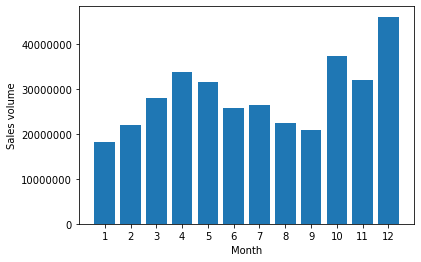

In [9]:
#create and customize plot to visualize data
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, best_sales_month["Sales"])
plt.xticks(months)
plt.ylabel("Sales volume")
plt.xlabel("Month")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

#The month with the highest sales volume is December (12)

#### Question 2: What city sold the most product? Answer:

In [10]:
#group data by cities with sum of product ordered
most_product_by_city = combined_csv.groupby("City").sum()



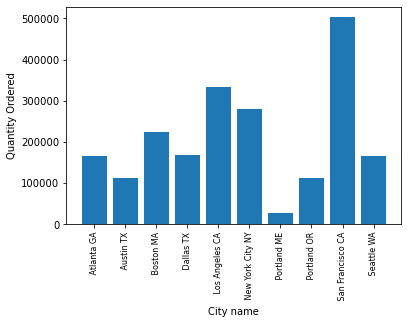

In [11]:
cities = [city for city, df in combined_csv.groupby('City')]

plt.bar(cities, most_product_by_city["Quantity Ordered"])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel("Quantity Ordered")
plt.xlabel("City name")
plt.show()

#City with the highest sales in product count is San Francisco, CA

#### Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product? Answer: 11 AM (11) or 7 PM (19)

In [12]:
combined_csv.head()
#parse hour data
combined_csv["Order Date"] = pd.to_datetime(combined_csv["Order Date"])
combined_csv["Hour"] = combined_csv["Order Date"].dt.hour
combined_csv["Minute"] = combined_csv["Order Date"].dt.minute
combined_csv["Count"] = 1

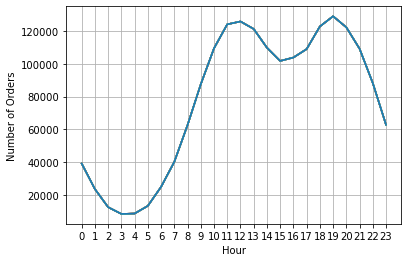

In [13]:
#visualize hour data to show peak order time

hours = [hour for hour, df in combined_csv.groupby('Hour')]

#unsimilar to summing the data by category, we are counting the occurance of each data (time of purchase)
plt.plot(hours, combined_csv.groupby(['Hour']).count())

plt.xticks(hours)
plt.ylabel("Number of Orders")
plt.xlabel("Hour")
plt.grid()
plt.show()

#Best time to display advertisement is right before the peak times, which are 11 AM (11) or 7 PM (19)

#### Question 4: What products are most often sold together? Answer:

In [14]:
#identify duplicate date
df = combined_csv[combined_csv['Order ID'].duplicated(keep=False)]

#group Product names with the same order ID in the new data frame
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))
df = df[['Order ID','Grouped']].drop_duplicates()

df.head(5)

,Order ID,Grouped
0,176558,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,"Wired Headphones,Wired Headphones,Wired Headph..."
6,176562,"USB-C Charging Cable,USB-C Charging Cable,USB-..."


In [16]:
#Reference: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

#identify common combinations of data
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_sublist = row.split(',')
    count.update(Counter(combinations(row_sublist, 2)))

for key, value in count.most_common(10):
    print(key, value)

('USB-C Charging Cable', 'USB-C Charging Cable') 990435
('Lightning Charging Cable', 'Lightning Charging Cable') 980010
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 933645
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 929465
('Wired Headphones', 'Wired Headphones') 853190
('Apple Airpods Headphones', 'Apple Airpods Headphones') 702105
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 602325
('27in FHD Monitor', '27in FHD Monitor') 338715
('iPhone', 'iPhone') 308090
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 280850


#### Question 5: What product sold the most? Why do you think it sold the most? Answer: batteries, cables, and headphones are the most sold product categories (batteries on top) because they are cheaper than other products.

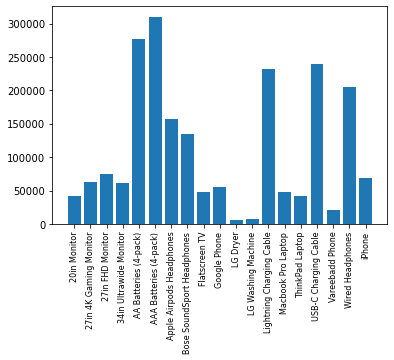

In [22]:
product_group = combined_csv.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in combined_csv.groupby('Product')]

keys = [pair for pair, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(keys, rotation='vertical',size=8)
plt.show()

<ipython-input-23-ad90a8c60804>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-23-ad90a8c60804>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


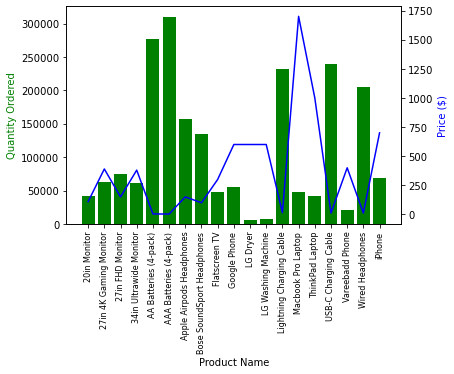

In [23]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = combined_csv.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

#The price for battery, cable, and headphones products are the Lowest, making them the highest quantity sold categories. 